# Exploration of Prosper Loan Dataset
## by Ndidi Charles Nweke

## Introduction
Money is not something we always have in abundant when we need it the most. To attend to some of our immediate needs, we sometimes have to borrow from someone. Prosper is a peer-to-peer lending marketplace that helps you get a loan when you are afraid of asking your friends or your friends are not as wealthy as can help you out.

For this project, a dataset of 113937 rows and 81 columns of loan data was provided to understand "What factors affect a loan’s outcome status? (whether they paid back successfully or not)" and "What affects the borrower’s ability to pay back?"

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
load_data = pd.read_csv("prosperLoanData.csv")

In [3]:
load_data.shape

(113937, 81)

In [4]:
#load_data.info()

In [5]:
load_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
load_data.isnull().sum().sum()

1364086

### What is the structure of your dataset?

There are 113,937 rows and 81 columns in the dataset. Most variables are numeric (61) with three boolean values. There are several attributes that are categorical in nature and would be treated as such. These include loanStatus, listingCategory amongst others. There are 1364086 missing values which would be attended to at some point.

Looking at the dataset for tidiness, there are two categories of data present, borrower's data and loan performance details.

### What is/are the main feature(s) of interest in your dataset?

I am interested in understanding what affects a loan's outcome status. Why do people get loans but find it difficult to pay back. Thus, leaving some loans either past due date, defaulted or charged-off. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The term of the loan can affect its outcome (LoanStatus) so does the Borrower's APR and interest rate. The ListingCategory of the loan can also affect its status since a loan for business is more likely to be paid than that for personal expenses. The Monthly Loan Payment and borrower's monthly income and other features would also be explored.

To this end, I have created a new dataframe which contains few columns that I will work with.

In [7]:
# create a dataset of only the variables I would be working with
prosper = load_data.loc[:, ['ListingNumber', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
        'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'CurrentDelinquencies',
        'AmountDelinquent', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey',
        'ProsperPrincipalBorrowed', 'LoanOriginalAmount', 'MonthlyLoanPayment']]

In [8]:
# rename the listing category to something friendly
prosper.rename(columns = {'ListingCategory (numeric)':'ListingCategory'}, inplace = True)

## Univariate Exploration

#### Loan Status

Let us explore the main variable of interest which is the LoanStatus (Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.)

In [9]:
prosper.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [10]:
def plot_(var):
    """
    plot categorical variables
    """
    variable = prosper[var]
    plt.figure(figsize=[10, 6])
    sb.countplot(data=prosper, x = variable, color=sb.color_palette()[0])
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(f"{var}")
    plt.ylabel("Number of Borrowers")
    plt.title(f"Distribution of {var}")
    plt.show()

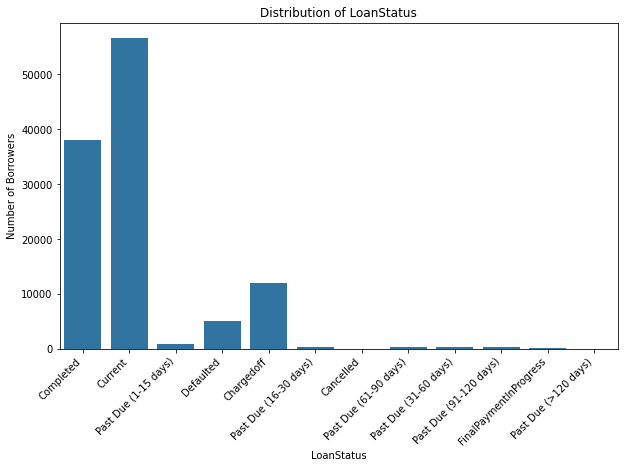

In [11]:
# plot of loan status
plot_("LoanStatus")

Once a payment is due, it means the person is having difficulties, whatever is their reason. I will merge all the due payments that it may be possible to get a glimpse of all of them.

In [12]:
# combine all past dues into one
prosper['LoanStatus'] = prosper['LoanStatus'].replace(['Past Due (16-30 days)', 'Past Due (61-90 days)',
        'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Past Due (1-15 days)'], 'Past Due')

In [13]:
prosper.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

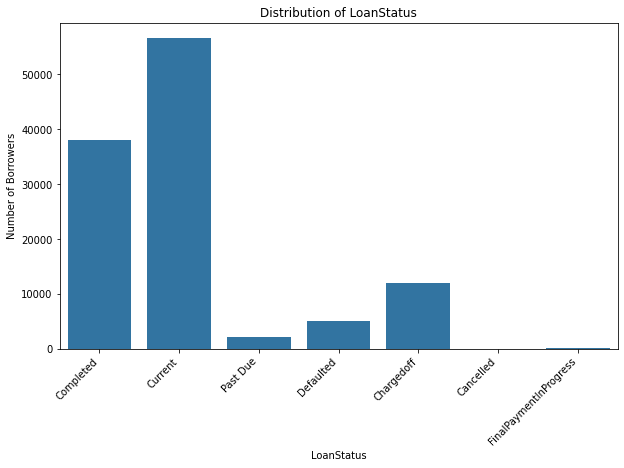

In [14]:
plot_("LoanStatus")

In [15]:
# percentage of each loan status
prosper['LoanStatus'].value_counts(normalize=True)*100

Current                   49.655511
Completed                 33.416713
Chargedoff                10.525115
Defaulted                  4.404188
Past Due                   1.814160
FinalPaymentInProgress     0.179924
Cancelled                  0.004388
Name: LoanStatus, dtype: float64

The majority (49.6%) of the borrowers are currently still paying their debt. The next majority are those that have completed their payments (33%). Whereas 10% of the loans have been chargedoff, about 6.2% are either defaulted or past due date.

What factors affect people's ability to complete their payments or be part of the defaulters or those chargedoff?
- What if the term of the loan is a factor?
- What if their employment status is a factor?

Let's explore those individually.

#### Loan term

In [16]:
# percentage of Loan terms
prosper['Term'].value_counts(normalize=True)*100

36    77.040821
60    21.542607
12     1.416572
Name: Term, dtype: float64

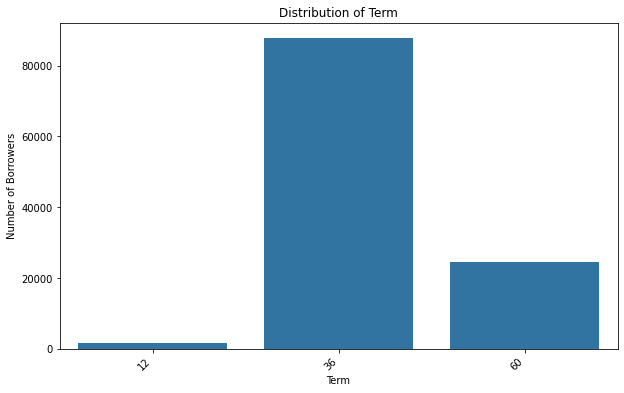

In [17]:
# plot of loan term in months
plot_("Term")

The loan terms distribution shows that very few people (1.4%) go for loans of 1 year duration. They mostly go for loans of 3 years duration (77.0%) and the remaining 21.5% go for 5 years. We will explore this further in Bivariate Analysis to know if there is a higher chance of people paying their loans when given more time.

#### Employment Status

In [18]:
prosper.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

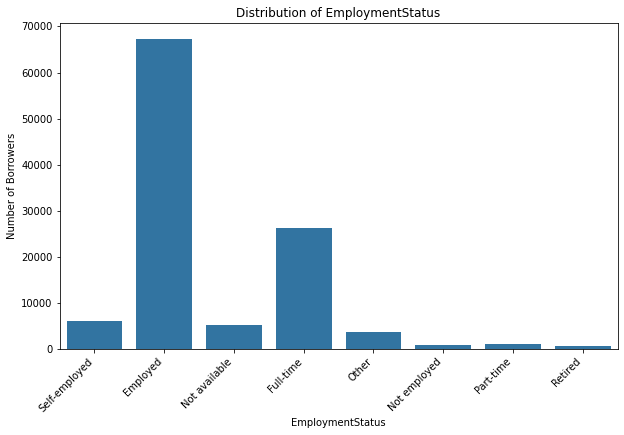

In [19]:
# plot of employment status
plot_("EmploymentStatus")

Looking at the count above and the visuals, we can observe that the number of employed isquite large, although it is quite unclear why such labels considering that self-employed, full-time and part-time all classify as employed.

Let's explore their Occupation to get more details on their employment status.

#### Occupation

In [20]:
prosper.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

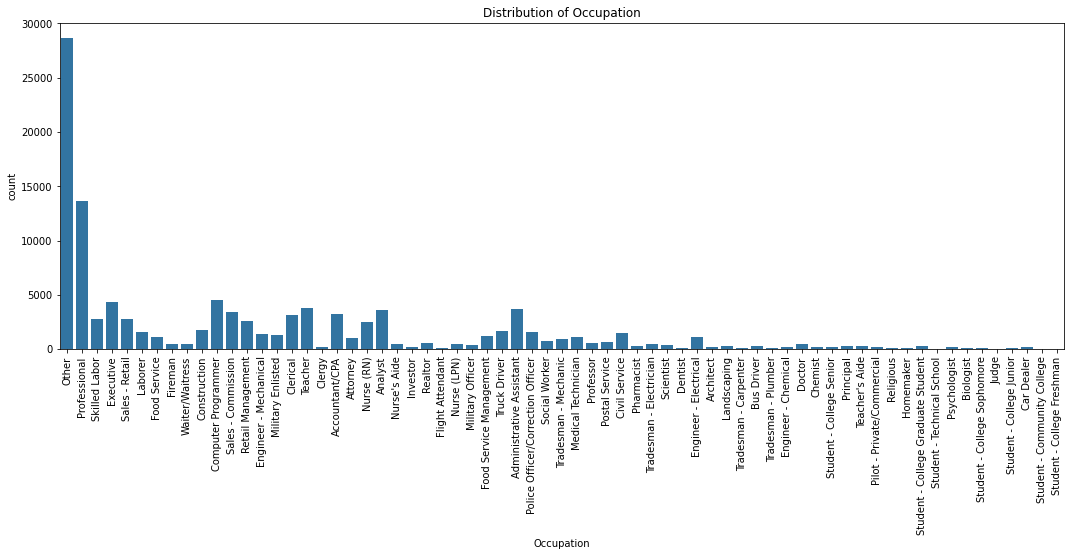

In [21]:
# plot of occupation
plt.figure(figsize=[18, 6])
sb.countplot(data=prosper, x = "Occupation", color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel("Occupation")
plt.title("Distribution of Occupation")
plt.show()

There are 67 occupation categories present. This increases the complexity of analysis so occupation won't be relied on for now.

#### Income Range

In [22]:
prosper.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [23]:
# combine $0, "not employed" and "not displayed" as $0
prosper['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [24]:
categories = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
cat_type = pd.api.types.CategoricalDtype(categories=categories, ordered=True)
prosper.IncomeRange = prosper.IncomeRange.astype(cat_type)

In [25]:
prosper.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

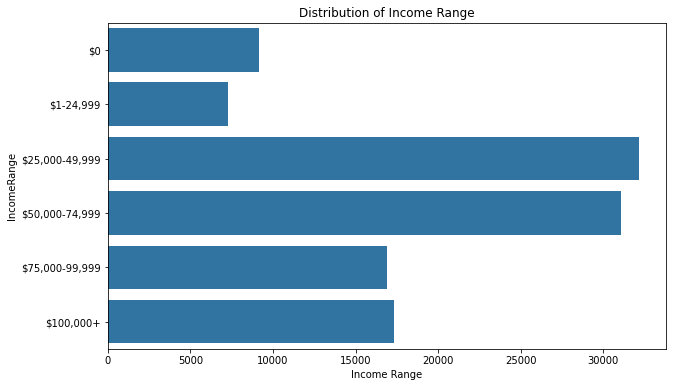

In [26]:
# plot of income range
plt.figure(figsize=[10, 6])
sb.countplot(data=prosper, y = "IncomeRange", color=sb.color_palette()[0])
plt.xlabel("Income Range")
plt.title(f"Distribution of Income Range")
plt.show()

We can see that people with income range of $25,000-74,999 are the two ranges who are taking the most loans.

#### Listing Category

In [27]:
prosper.ListingCategory.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

In [28]:
# combine unspecified reason (0) with other (7)
prosper['ListingCategory'].replace(0, 7, inplace = True)

In [29]:
prosper.ListingCategory.value_counts()

1     58308
7     27459
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

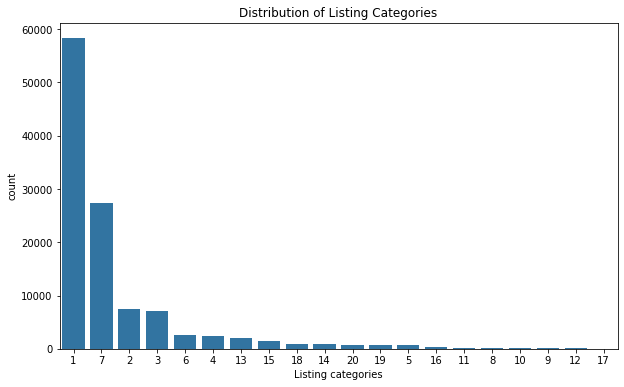

In [30]:
# plot of listing category
plt.figure(figsize=[10, 6])
sb.countplot(data=prosper, x = "ListingCategory", color=sb.color_palette()[0], order = prosper.ListingCategory.value_counts().index)
plt.xlabel("Listing categories")
plt.title("Distribution of Listing Categories")
plt.show()

The major reason people take loans is for Debt Consolidation (1). The second major reason is Other (7) which is unspecified. The next three reasons are, for home improvement (2), business (3) and Auto (6). 

The top 8 reasons people take loans are (in order of magnitude):
- Debt Consolidation (1)
- Other (7)
- Home improvement (2)
- Business (3)
- Auto (6)
- Personal loan (4)
- Household expenses (13) 
- Medical/Dental (15)


#### Borrower State

In [31]:
prosper.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

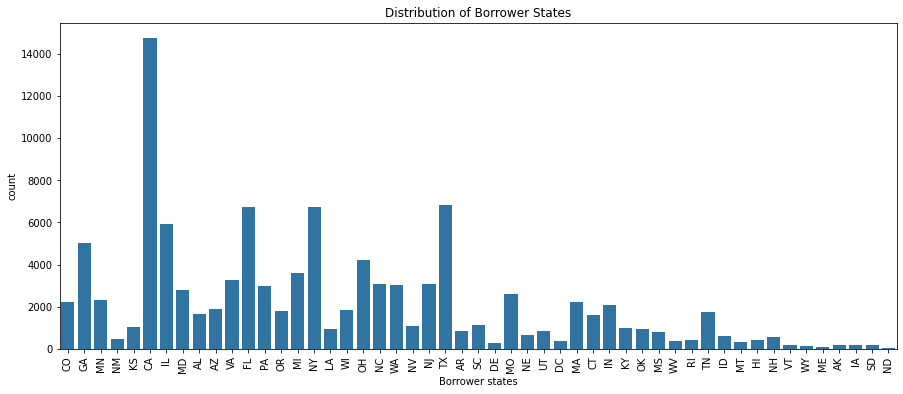

In [32]:
plt.figure(figsize=[15, 6])
sb.countplot(data=prosper, x = "BorrowerState", color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.xlabel("Borrower states")
plt.title("Distribution of Borrower States")
plt.show()

In [33]:
#percentage from California
((prosper.BorrowerState == 'CA').sum()/(prosper.BorrowerState.value_counts()).sum())*100

13.573813432698161

13.5% of the borrowers are from California where the company is located. 

In the next step, we will try to understand the how the income range of borrowers affects their ability to repay a loan.

#### Borrower Annual Percentage Rate (APR)

In [34]:
prosper.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

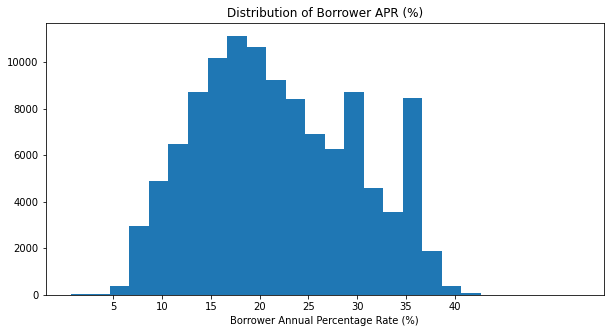

In [35]:
# Distribution of Borrower APR in percentage 
binsize = 2
bins = np.arange(prosper['BorrowerAPR'].min()*100, prosper['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = prosper['BorrowerAPR']*100, bins = bins)
plt.title('Distribution of Borrower APR (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

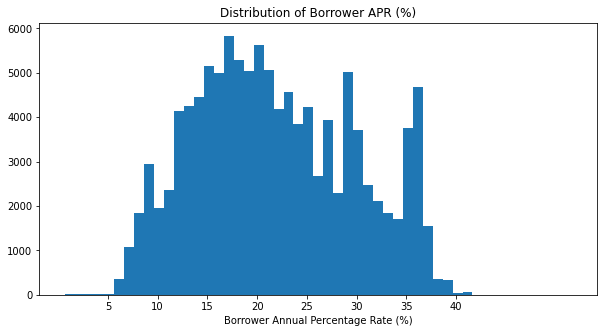

In [36]:
# Reducing the bins to 1
binsize = 1
bins = np.arange(prosper['BorrowerAPR'].min()*100, prosper['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = prosper['BorrowerAPR']*100, bins = bins)
plt.title('Distribution of Borrower APR (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

The Borrower Annual percentage rate looks normally distributed but with abnormal peaks here andthere especially around 30 and 36 percents.

#### Employment Duration 

Settling into a new job can makepeople get loans and it can also affct their ability to repay due loans. Do people's duration on a job affect their loan status? Let's explore their employment duration before comparing it with their loan status.

In [37]:
prosper.EmploymentStatusDuration.value_counts()[:30]

0.0     1534
4.0     1186
1.0     1177
3.0     1174
2.0     1153
5.0     1151
7.0     1116
6.0     1103
8.0     1103
12.0    1076
9.0     1025
13.0    1020
10.0    1008
11.0     991
14.0     989
15.0     933
17.0     930
19.0     899
18.0     894
26.0     889
16.0     886
24.0     874
22.0     868
23.0     855
21.0     851
25.0     843
20.0     836
27.0     812
28.0     796
36.0     762
32.0     758
29.0     757
30.0     757
Name: EmploymentStatusDuration, dtype: int64

In [38]:
prosper.EmploymentStatusDuration.describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

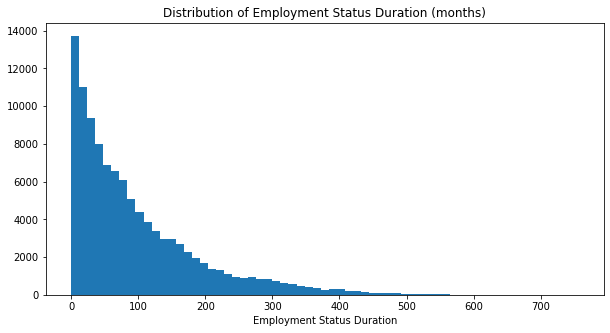

In [39]:
binsize = 12
bins = np.arange(0, prosper['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = prosper.EmploymentStatusDuration, bins = bins)
plt.xlabel('Employment Status Duration')
plt.title('Distribution of Employment Status Duration (months)')
plt.show()

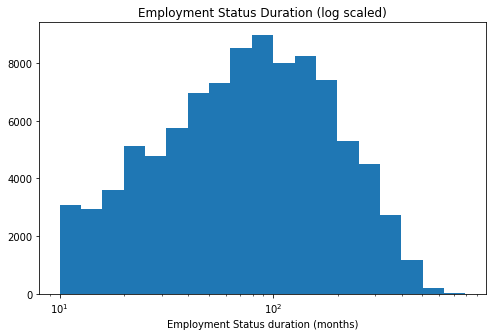

In [40]:
# there's a long tail in the distribution, so let's use a log scale
log_binsize = 0.1
bins = 10 ** np.arange(1, np.log10(prosper['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(x = prosper.EmploymentStatusDuration, bins = bins)
plt.xscale('log')
plt.xlabel('Employment Status duration (months)')
plt.title('Employment Status Duration (log scaled)')
plt.show()

Employment Status Duration has a long-tailed distribution, with a lot of borrowers staying at a job from 0 to 13 months. When plotted on a log-scale, the employment duration distribution looks right skewed.

#### Monthly loan Payment

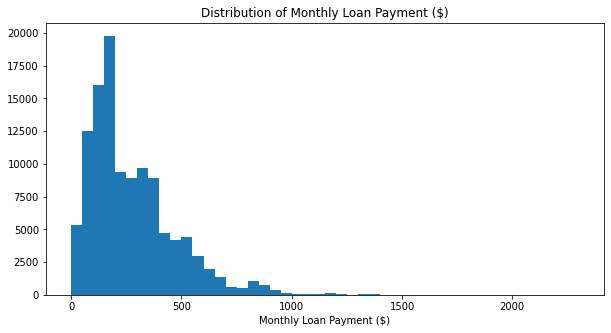

In [41]:
binsize = 50
bins = np.arange(0, prosper['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = prosper.MonthlyLoanPayment, bins = bins)
plt.xlabel('Monthly Loan Payment ($)')
plt.title('Distribution of Monthly Loan Payment ($)')
plt.show()

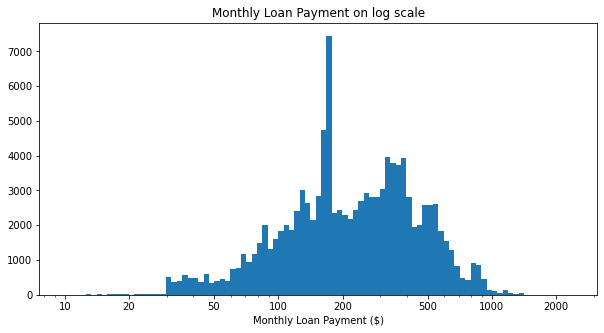

In [42]:
# Using log-scale to recreate the monthly loan payment
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(prosper['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = prosper.MonthlyLoanPayment, bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.title('Monthly Loan Payment on log scale')
plt.show()

The distribution of monthly loan payment had a long tail. When plotted on a log scale, we can see a spike at 150 to 200 and some increases at 400 and 500 dollars.

In [43]:
prosper[prosper.MonthlyLoanPayment >1500]

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,...,CurrentlyInGroup,CurrentDelinquencies,AmountDelinquent,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment
8572,625497,12,Completed,0.17493,0.1177,1,CA,Construction,Employed,293.0,...,False,0.0,0.0,"$100,000+",True,10333.333333,AEB536610571490589752E8,NaN,25000,2218.53
14493,718172,12,FinalPaymentInProgress,0.17878,0.1215,1,OH,Laborer,Employed,139.0,...,False,1.0,447.0,"$50,000-74,999",True,5000.000000,24A9367574634763428AE8A,NaN,20000,1778.38
17504,704191,12,Completed,0.07090,0.0615,2,NY,Attorney,Employed,55.0,...,False,0.0,0.0,"$100,000+",True,19166.666667,C566367298632778359D33D,NaN,25000,2153.38
19907,691747,12,Completed,0.11731,0.0801,1,WA,Professional,Employed,207.0,...,False,0.0,0.0,"$100,000+",True,12583.333333,FBEC3671485807488DE3C48,NaN,20000,1739.86
20533,735327,12,Current,0.18192,0.1246,1,MI,Investor,Employed,9.0,...,False,1.0,0.0,"$75,000-99,999",True,6416.666667,ED4D36770938065369061CA,NaN,20000,1781.28
29025,732140,12,Current,0.11066,0.0735,1,CA,Other,Employed,4.0,...,False,0.0,0.0,"$100,000+",True,15000.000000,545E3678582509172575561,22000.0,18988,1646.00
32764,710281,12,Completed,0.06799,0.0586,1,FL,Executive,Employed,101.0,...,False,1.0,232.0,"$100,000+",True,22083.333333,64403675895228781F62701,NaN,20000,1720.04
49093,689878,12,Completed,0.12115,0.0839,15,CA,Doctor,Employed,52.0,...,False,0.0,0.0,"$100,000+",True,25000.000000,0AC13670915936986E921B2,NaN,25000,2179.22
49134,675300,12,Completed,0.13204,0.0947,1,IN,Other,Employed,70.0,...,False,0.0,0.0,"$100,000+",True,16500.000000,4FCC366793687199711610C,NaN,20000,1753.39
55456,741854,12,Current,0.16803,0.1109,2,SC,Nurse (RN),Employed,82.0,...,False,0.0,0.0,"$100,000+",True,8333.333333,01733679724004241663F06,NaN,20000,1768.47


#### Stated Monthly income

In [44]:
prosper.StatedMonthlyIncome.value_counts()

4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

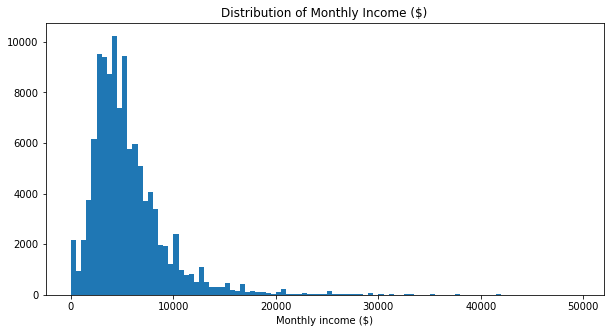

In [45]:
binsize = 500
bins = np.arange(0, 50000, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = prosper.StatedMonthlyIncome, bins = bins)
plt.xlabel('Monthly income ($)')
plt.title('Distribution of Monthly Income ($)')
plt.show()

In [46]:
prosper[prosper.StatedMonthlyIncome > 25000]

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,...,CurrentlyInGroup,CurrentDelinquencies,AmountDelinquent,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment
196,656502,60,Current,0.15752,0.1346,19,NY,Other,Employed,89.0,...,False,0.0,0.0,"$100,000+",True,33333.333333,43C23665290560530B80B44,NaN,25000,574.73
224,1130508,36,Current,0.13799,0.1099,1,WI,Sales - Commission,Employed,114.0,...,False,0.0,0.0,"$100,000+",True,33333.333333,5B37370457127496019ABA1,NaN,30000,982.02
307,1064774,36,Current,0.15223,0.1239,1,NJ,Professional,Self-employed,26.0,...,False,1.0,50.0,"$100,000+",False,40000.000000,10E63700619265962788449,NaN,15000,501.01
334,717871,36,Current,0.21025,0.1734,2,CT,Executive,Employed,27.0,...,False,0.0,0.0,"$100,000+",True,27500.000000,78B436750528046526B99BF,8000.0,12000,429.87
521,232066,36,Completed,0.17420,0.1670,7,MI,Doctor,Full-time,162.0,...,False,0.0,0.0,"$100,000+",True,30166.666667,BCAD3406018743373403DCA,25000.0,5000,177.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112804,883021,36,Current,0.25781,0.2199,1,PA,Attorney,Employed,374.0,...,False,0.0,0.0,"$100,000+",False,29166.666667,A59336905841979551A4A3D,NaN,4000,152.74
112921,970853,36,Current,0.06726,0.0605,1,TX,Executive,Employed,162.0,...,False,0.0,0.0,"$100,000+",True,31666.666667,C2CB36963011070828F0339,NaN,19000,578.45
112981,1084188,36,Current,0.12691,0.0990,1,CA,Sales - Commission,Self-employed,307.0,...,False,0.0,0.0,"$100,000+",False,30000.000000,20B637030876010103EBEE3,NaN,12000,386.64
113270,715718,36,Current,0.22712,0.1899,7,CA,Other,Employed,173.0,...,False,0.0,0.0,"$100,000+",True,394400.000000,C6C536749708412328A7D15,NaN,2000,73.30


The Stated Monthly Income has a tailed distribution with a staggering peak around $4000.

Let's create a column necessary for the multivariate analysis.

The new column LoanIncomeRatio is gotten using **(MonthlyLoanPayment/StatedMonthlyIncome)\*100**.

The reason for this is that, the lesser this ratio, the higher the chances of the individual settling their loans. This is a hypothesis we would be confirming at the end of this analysis.

In [47]:
# create a loanIncomeRatio column
prosper["LoanIncomeRatio"] = (prosper["MonthlyLoanPayment"]/prosper["StatedMonthlyIncome"])*100
prosper['LoanIncomeRatio'] = prosper['LoanIncomeRatio'].replace(np.inf, np.nan)
prosper = prosper.drop(prosper[prosper['LoanIncomeRatio'] == np.nan].index)

In [48]:
# get loan status = past due | defaulted | charged off for the $0 income range
bad_ = (prosper['LoanStatus'] == 'Past Due') | (prosper['LoanStatus'] == 'Defaulted') | (prosper['LoanStatus'] == 'Chargedoff')
bad_loans = prosper.loc[bad_, :]

In [49]:
# create a subset of the good loans
good_loans = prosper.loc[~bad_, :]
#print(good_loans)

In [50]:
# get the means of the bad loans data
bad_loans.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8160\328951199.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bad_loans.mean()


ListingNumber               366373.472244
Term                            38.345023
BorrowerAPR                      0.253843
BorrowerRate                     0.232049
ListingCategory                  4.771924
EmploymentStatusDuration        82.161956
IsBorrowerHomeowner              0.451224
CurrentlyInGroup                 0.247104
CurrentDelinquencies             1.485353
AmountDelinquent              1423.315720
IncomeVerifiable                 0.909420
StatedMonthlyIncome           4550.076113
ProsperPrincipalBorrowed      6919.905714
LoanOriginalAmount            6623.512816
MonthlyLoanPayment             239.287179
LoanIncomeRatio               2838.696699
dtype: float64

In [51]:
# get the means of the good loans data
good_loans.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8160\1909949240.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  good_loans.mean()


ListingNumber               680477.602962
Term                            41.330044
BorrowerAPR                      0.211784
BorrowerRate                     0.184863
ListingCategory                  3.624352
EmploymentStatusDuration        98.534411
IsBorrowerHomeowner              0.515180
CurrentlyInGroup                 0.084388
CurrentDelinquencies             0.413725
AmountDelinquent               906.814466
IncomeVerifiable                 0.926829
StatedMonthlyIncome           5820.786498
ProsperPrincipalBorrowed      8721.907815
LoanOriginalAmount            8681.610721
MonthlyLoanPayment             279.150240
LoanIncomeRatio                414.694454
dtype: float64

In [52]:
prosper.loc[prosper.LoanIncomeRatio == 1257173.0286921149]

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,...,CurrentDelinquencies,AmountDelinquent,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LoanIncomeRatio
52427,121198,36,Chargedoff,0.29776,0.29,7,CA,Other,Self-employed,5.0,...,0.0,0.0,"$1-24,999",False,0.083333,E37533882090528462F66F6,NaN,25000,1047.64,1.257173e+06


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Loan Status had several past due dates according to number of days due. These dates were combined into one (Past Due) for easy access.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During visualisation, some of the columns were log transformed to closely understand the data further. Amongst these is BorrowerAPR which was right skewed but after transformation revealed irregular spikes. Employment Status Duration showed a long-tailed distribution which after log transformed I noticed a left-skewed distribution. Monthly Loan Payment was also log scaled.

Income range was converted to categories to help order the appearance of the visualisation.

Also, a column LoanIncomeRatio was created to help us during multivariate analysis. And two subset of the loan status were created: good loans and bad loans.

## Bivariate Exploration

#### Correlation Analysis

Let's start by understanding how these features are related to each other.

In [53]:
numeric_vars = ["BorrowerAPR", "EmploymentStatusDuration", "StatedMonthlyIncome", "MonthlyLoanPayment", "Term"]
categoric_vars = ["LoanStatus", "EmploymentStatus", "IncomeRange", "ListingCategory", "BorrowerState"]

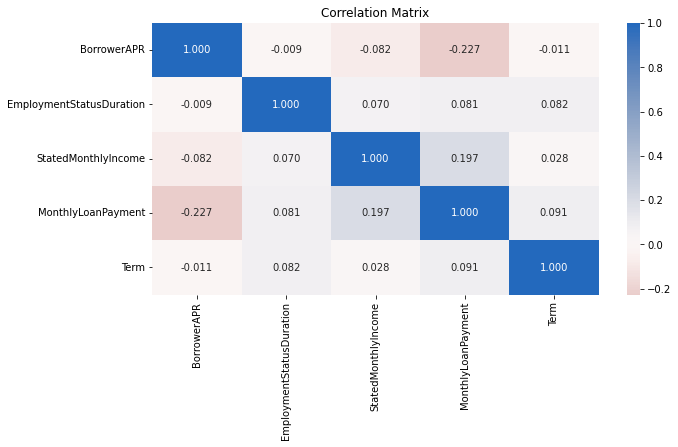

In [54]:
# Correlation matrix for the numeric variables
plt.figure(figsize = [10, 5])
sb.heatmap(prosper[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

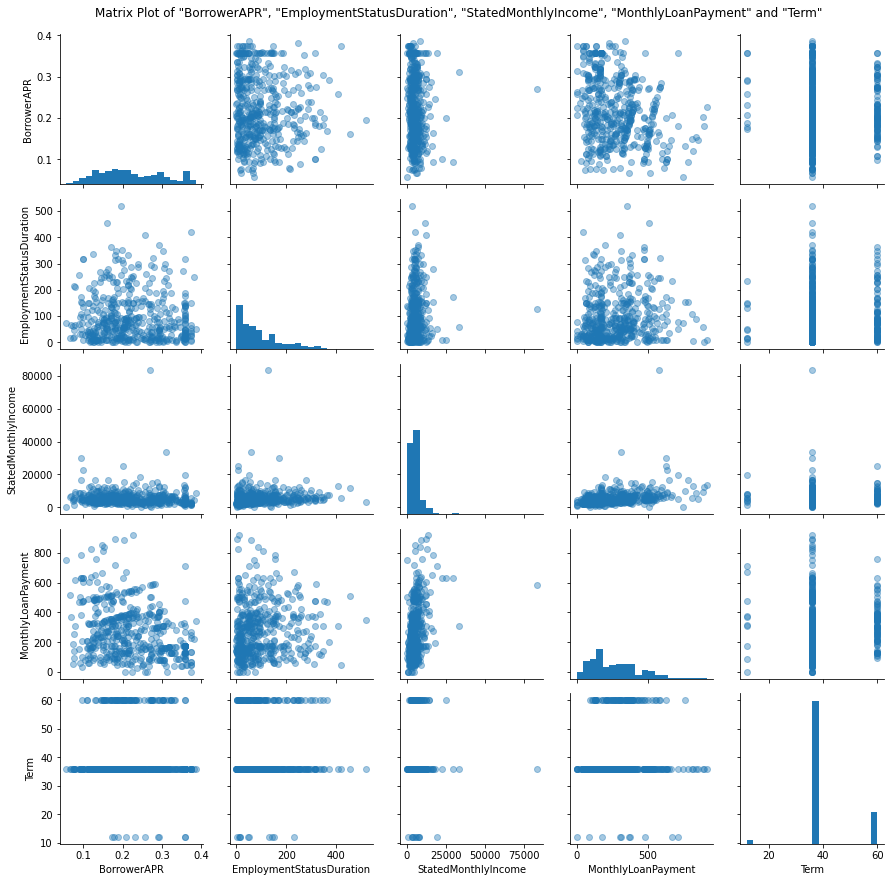

In [55]:
# plot matrix: sample 500 loan data so that plots are clearer and rendered faster
samples = np.random.choice(prosper.shape[0], 500, replace = False)
prosper_sample = prosper.loc[samples,:]

g = sb.PairGrid(data = prosper_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 0.4)

g.fig.suptitle('Matrix Plot of "BorrowerAPR", "EmploymentStatusDuration", "StatedMonthlyIncome", "MonthlyLoanPayment" and "Term"')
g.fig.subplots_adjust(top = .95);

plt.show();

It is impressive to see that monthly loan payment is positively correlated to their stated monthly income and as well, the borrower's duration of employment. It also proves to be positively related to the term of their loan. Although it is comforting to see that borrower's APR is positively correlated to the term of the loan it is however, negatively correlated to employment duration and stated monthly income.

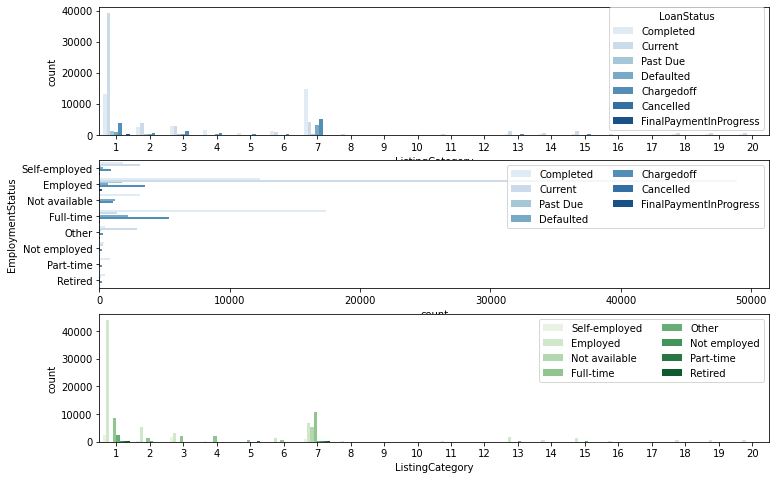

In [56]:
# plot of "LoanStatus", "EmploymentStatus", "IncomeRange", "ListingCategory", "BorrowerState"
plt.figure(figsize = [12, 8])

# subplot 1: listing cateory vs loan status
plt.subplot(3, 1, 1)
sb.countplot(data = prosper, x = 'ListingCategory', hue = 'LoanStatus', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = prosper, y = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = prosper, x = 'ListingCategory', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

Those within Listingcategories 1 to 7 are active on their loan payment with those who used it for debt consolidation (1) and others (7) being active the most. Those with emploment status of employed are active as well. Despite the errors in categorising the employments, we can see that all employment status relating to one having a job are complying. We will explore further the relationship between employment status and loan payment.

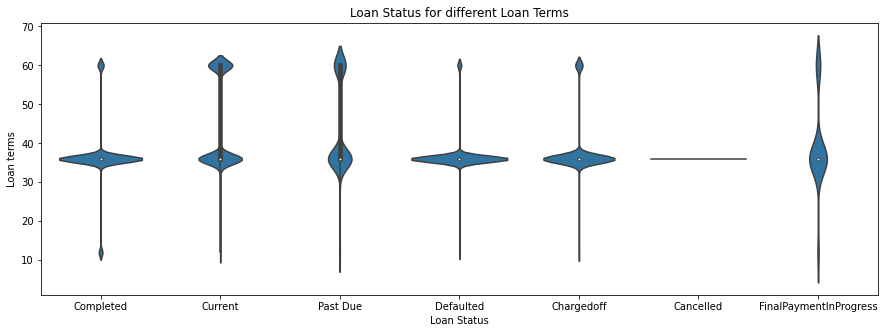

In [57]:
#plot of Loan term vs loan status
plt.figure(figsize = [15, 5])
sb.violinplot(data=prosper, y='Term', x='LoanStatus',color=sb.color_palette()[0]);
plt.title('Loan Status for different Loan Terms')
plt.xlabel('Loan Status');
plt.ylabel('Loan terms');

The loan status for different loan terms reveals that majority of the loans are scheduled for 3 years, then 5 years. This agrees with the visualisations earlier for Loan status. It also reveals that the majority of those Currently paying and those Past their due dates are in the upper quartile. It also shows that those who have completed their payments were more consistent. The majority of people that opted for a 12 month loan term have completed their payment with a few still in progress.

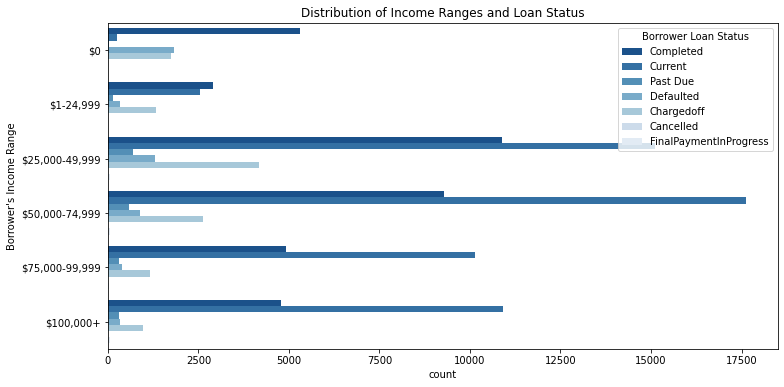

In [58]:
# plot of IncomeRange vs loan status
plt.figure(figsize = [12,6])
ax = sb.countplot(data = prosper, y = 'IncomeRange', hue = 'LoanStatus', palette = 'Blues_r')
ax.legend(title = 'Borrower Loan Status')
plt.title('Distribution of Income Ranges and Loan Status')
plt.ylabel('Borrower\'s Income Range');

Looking at income ranges and loan status, we can immediately confirm our earlier visual that the income ranges between $25,000 and $74,999 make up the majority of those either currently paying their loans or have completed paying up. Also, we can notice the progress of those within $75k and $100k+ whom are currently paying up. Although majority of $0 income have completed their payment, those at $75k to $100k+ also make up the population of those that are completed.

Speaking of final payment progress, those within $25k and $49,999 are still at the top of those complying. Followed by those at $50k to $74,999.

Looking at the progress of those in the $0 range would make one to believe that there seems to be an anomaly for them to be earning nothing yet, be up to speed with their payments. This then, might be an issue of bad input.

Let's subset the dataset by those earning $0 and then get their occupation and loan status.

In [59]:
# getting occupation of the $0 income range
zero_income = (prosper['IncomeRange'] == '$0')
print(zero_income.sum())
#print(prosper.loc[zero_income, :])

9168


In [60]:
prosper_sub = prosper.loc[zero_income, :]

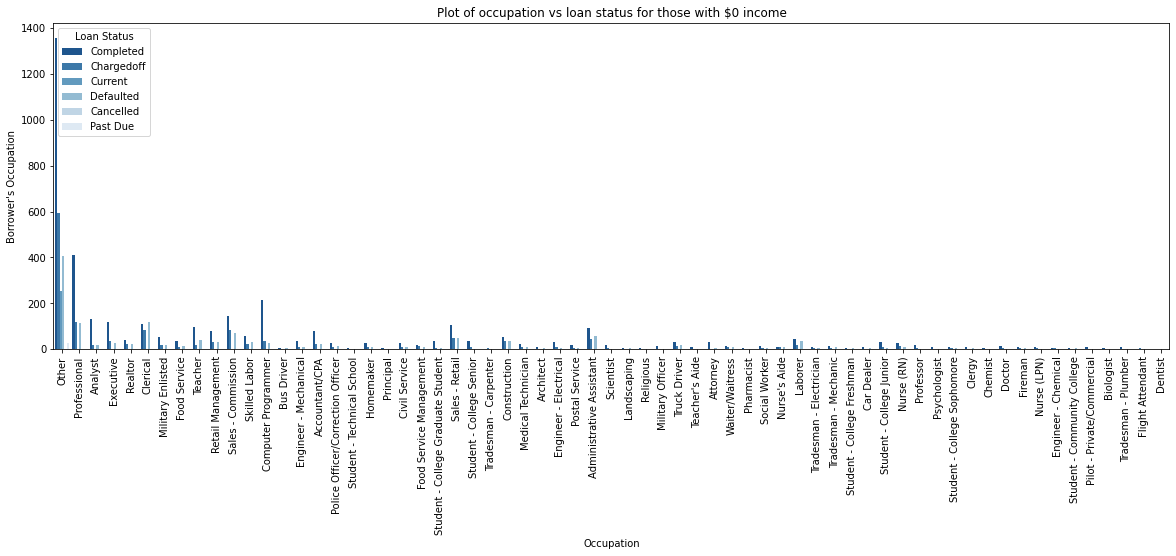

In [61]:
# plot of occupation vs loan status for those with $0 income
plt.figure(figsize = [20,6])
ax = sb.countplot(data = prosper_sub, x = 'Occupation', hue = 'LoanStatus', palette = 'Blues_r')
ax.legend(title = 'Loan Status')
plt.title('Plot of occupation vs loan status for those with $0 income')
plt.xticks(rotation=90)
plt.ylabel('Borrower\'s Occupation');

There are 9168 borrowers with $0. This is unusual as a majority of them pay their loans. Looking up their occupation revealed that these individuals are working professionals and looking at the visuals above, with a high loan payment for each occupation, it can then be taken that there must have been an error in data input.

But then, why do people end up not paying their loans? This is a question to explore further in the next section.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The loan status for different loan terms shows that majority of the loan terms are for 3 years (36 months). It also shows that majority of those who opted for a 12 month loan duration have completed their payment with a very few still in progress.

The income range between $25k to $100k+ are the majority of those who have completed payment or in progress. 
The progress in the $0 income range led to inspecting the range further. This revealed that it might be an input issue as majority of those classified as earning nothing but yet clearing their loans are professionals who, most likely, hold their reputations high.

This issue of being in the $0 income range yet clearing one's debt will help in understanding the non-payment of loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A correlation of the numeric variables showed that the monthly loan payment is positively related to the stated monthly income. This observation would help our exploration in the next section to understand the non-payment of loans further.

## Multivariate Exploration

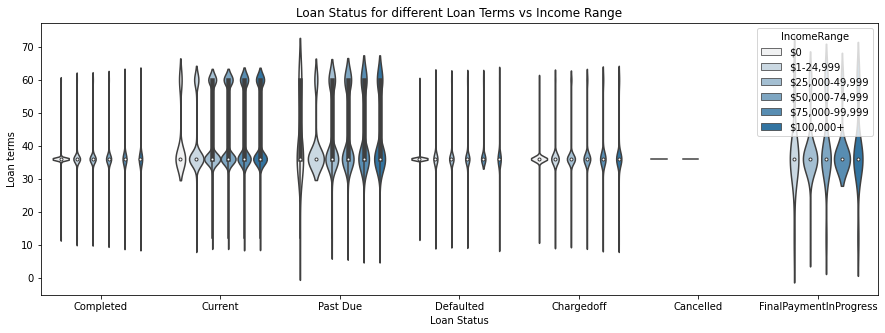

In [62]:
#plot of Loan term vs loan status and IncomeRange
plt.figure(figsize = [15, 5])
sb.violinplot(data=prosper, y='Term', x='LoanStatus', hue= 'IncomeRange',color=sb.color_palette()[0]);
plt.title('Loan Status for different Loan Terms vs Income Range')
plt.xlabel('Loan Status');
plt.ylabel('Loan terms');

The above is to confirm the point that those in $0 income cleared their loans. However, since the income range has the shortcoming of placing some income earners within the $0 range, emphasis would be shifted to understanding the stated monthly income and monthly repayment for those who are past due date, defaulted on their loan or charged-off.

In the light of this, let's use the subset of those whom are indebted. That is, their loan status is past due date, defaulted or charged off.

<Figure size 1728x576 with 0 Axes>

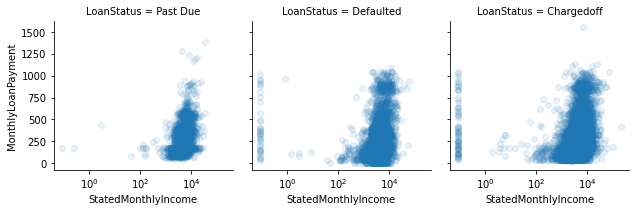

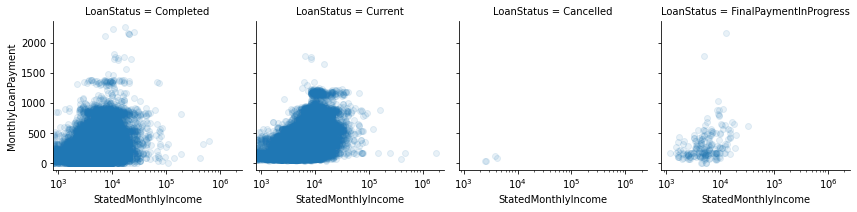

In [63]:
# plot of the bad loans against stated monthly income and monthly loan payment
plt.figure(figsize=[24,8])
g = sb.FacetGrid(data = bad_loans, col = 'LoanStatus')
g.map(plt.scatter, 'StatedMonthlyIncome', 'MonthlyLoanPayment', alpha=0.1)
plt.xscale("log")

# a plot of good loans against stated monthly income and monthly loan payment
g = sb.FacetGrid(data = good_loans, col = 'LoanStatus')
g.map(plt.scatter, 'StatedMonthlyIncome', 'MonthlyLoanPayment', alpha=0.1)
plt.xscale("log");

Surprisingly, 

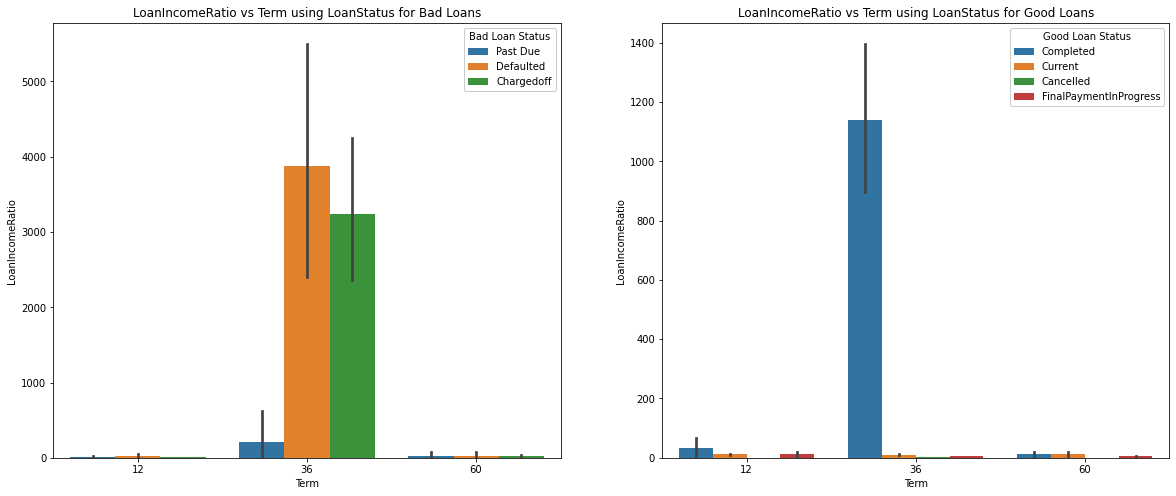

In [64]:
#create a plot of LoanIncomeRatio vs Term and Loan Status for the bad loans
plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bad_loans, x = 'Term', y = 'LoanIncomeRatio', hue = 'LoanStatus')
ax.legend(ncol=1, framealpha=1, title='Bad Loan Status')
plt.title('LoanIncomeRatio vs Term using LoanStatus for Bad Loans');

#create a plot of LoanIncomeRatio vs Term and Loan Status for the good loans
plt.subplot(1, 2, 2)
ax = sb.barplot(data = good_loans, x = 'Term', y = 'LoanIncomeRatio', hue = 'LoanStatus')
ax.legend(ncol=1, framealpha=1, title='Good Loan Status')
plt.title('LoanIncomeRatio vs Term using LoanStatus for Good Loans');

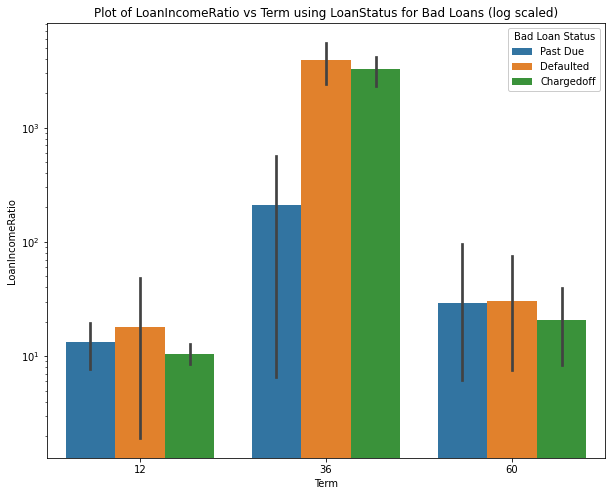

In [65]:
# log transform the plot of LoanIncomeRatio vs Term and Loan Status for readability
plt.figure(figsize=[10,8])
ax = sb.barplot(data = bad_loans, x = 'Term', y = 'LoanIncomeRatio', hue = 'LoanStatus')
ax.set_yscale('log')
ax.legend(ncol=1, framealpha=1, title='Bad Loan Status')
plt.title('Plot of LoanIncomeRatio vs Term using LoanStatus for Bad Loans (log scaled)');

Given a loan term of 1, 3 and 5 years, 77.0% of borrowers settled for 3 years duration, 21.5% settled for 5 years and the remaining 1.4% was for those of 1 year duration. From the analysis so far, it is observed that, the duration has little to nothing to do with the borrower's ability to pay back the loan. Rather, the higher the ratio of the borrower's monthly loan repayment to their monthly income, the higher their likelihood of them having challenged paying back.

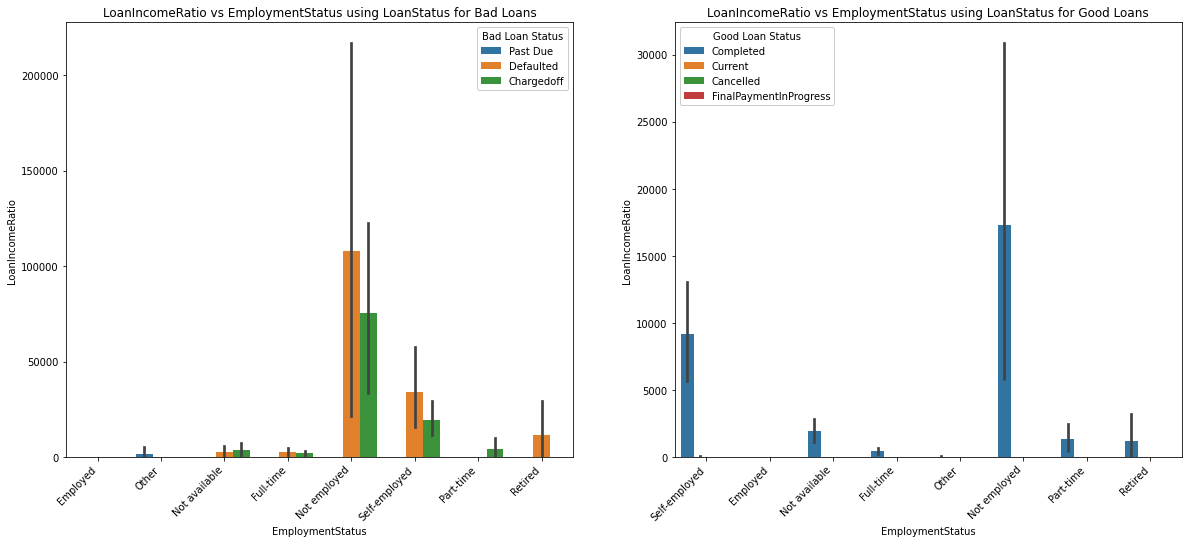

In [66]:
# the plot of LoanIncomeRatio vs Employment status and Loan Status
plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bad_loans, x = 'EmploymentStatus', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.xticks(rotation=45, ha="right")
ax.legend(ncol=1, framealpha=1, title='Bad Loan Status')
plt.title('LoanIncomeRatio vs EmploymentStatus using LoanStatus for Bad Loans');

plt.subplot(1, 2, 2)
# the plot of LoanIncomeRatio vs EmploymentStatus and Loan Status
ax = sb.barplot(data = good_loans, x = 'EmploymentStatus', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.xticks(rotation=45, ha="right")
ax.legend(ncol=1, framealpha=1, title='Good Loan Status')
plt.title('LoanIncomeRatio vs EmploymentStatus using LoanStatus for Good Loans');

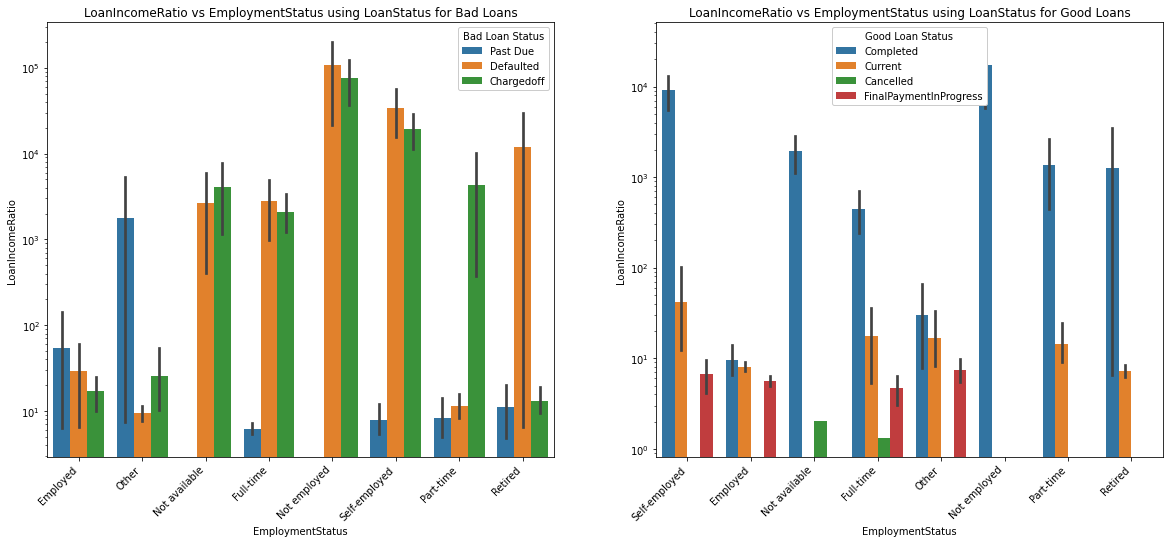

In [67]:
# the plot of LoanIncomeRatio vs Employment status and Loan Status
plt.figure(figsize=[20,8])

plt.subplot(1, 2, 1)
ax = sb.barplot(data = bad_loans, x = 'EmploymentStatus', y = 'LoanIncomeRatio', hue = 'LoanStatus')
plt.xticks(rotation=45, ha="right")
ax.set_yscale('log')
ax.legend(ncol=1, framealpha=1, title='Bad Loan Status')
plt.title('LoanIncomeRatio vs EmploymentStatus using LoanStatus for Bad Loans');

plt.subplot(1, 2, 2)
# the plot of LoanIncomeRatio vs EmploymentStatus and Loan Status
ax = sb.barplot(data = good_loans, x = 'EmploymentStatus', y = 'LoanIncomeRatio', hue = 'LoanStatus')
ax.set_yscale('log')
plt.xticks(rotation=45, ha="right")
ax.legend(ncol=1, framealpha=1, title='Good Loan Status')
plt.title('LoanIncomeRatio vs EmploymentStatus using LoanStatus for Good Loans');

Looking at their loan status with regards to employment status and loan-income-ratio reveals that those with the most completed loan payments are those tagged as not employed followed by those that are self-employed. Contrasting this with the bad loan plot, it is clear that they defaulted the most as well on their loans followed by the self-employed.

The large error bars on the not employed also explains how their income varies a lot. This is probably due to them trying to get investors to give them loan despite not working or a data extraction error. Looking closely at the bad loan profiles, there seems to be unclear patterns for those tagged other, part-time, retired and employed. The variations in their LoanIncomeRatio means that some loans that are too large for them to be able to pay back.

Overall, it is important to note that the self-employed, retired and not-employed have highly variable loan-income-ratio across all loans. This trend is worse for the bad loans as the visuals suggest. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Successful payment of a loan depends on several factors. One of this was the monthly income and monthly loan repayment. Although, more could be done to understand how the Listing category, employment status duration and other factors contribute to the successful repayment of a loan. Using LonIncomeRatio and employment status showed that people go for loan amounts that are bigger than they can pay back with regards to how much they make monthly.

### Were there any interesting or surprising interactions between features?

Looking back at loan status, it wasn't clear that income range would be redundant. After now, it is pertinent to say that the status of a loan is reliant on a chain reaction across several features. The success of a borrower paying back their monthly installment depends on how much they earn per month and as well their employment status.

## Conclusions
It all started with the question: Why would someone borrow money and refuse to pay back?

Of 81 variables, 22 were selected to help us answer the question at hand. 

In conclusion, given a loan term of 1, 3 and 5 years, 77.0% of borrowers settled for 3 years duration, 21.5% settled for 5 years and the remaining 1.4% was for those of 1 year duration. In an attempt to understand why people don't pay back their loans, we assumed that it is due to little income, being unemployed and also not being given enough time.

Finally, from the analysis so far, it is observed that, the duration has little to nothing to do with the borrower's ability to pay back the loan. Rather, the higher the ratio of the borrower's monthly loan repayment to their monthly income, the higher the likelihood of them having difficulty paying back. A close look at the average of the good and bad loan details below will help understand how a very large percentage of the bad borrower's income went to service debt.

| | Good loans | Bad loans |
| ----- | ----- | ----- |
| Monthly loan payment ($) | 279 | 239 |
| Stated monthly income (\$) | 5820 | 4550 |
| Loan-income-ratio (%) | 414 | 2838 |

This was further explored using the loan-income-ratio vs employment status to see their influence on the loan staus. It was then noticed that there is a large variation of loan-income-ratio amongst those tagged as unemployed, self-employed, retired and some employed who had bad loans.

The end leaves us with a further question: Why would investors give loans to someone who clearly would be unable to pay it back? The answer probably lies in understanding their reason for taking the loans. 